<a href="https://colab.research.google.com/github/barkas90/Detection-of-deformed-image-features/blob/main/OnlyClothes_komandinis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Greyscalint reikia abu paveikslėlius(ir master), nes kitaip rezultatai nesikiria

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))
!  apt -q update && apt -q install -y libpcl-dev libsuitesparse-dev #assumes colab already contains OpenCV 

<IPython.core.display.Javascript object>

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://archive.ubuntu.co

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))

#Clone repository and build from source
! git clone "https://github.com/verlab/GeobitNonrigidDescriptor_ICCV_2019.git"
%cd GeobitNonrigidDescriptor_ICCV_2019
! mkdir build
%cd build
! cmake -DNO_CONTRIB=ON ..
! make -j

<IPython.core.display.Javascript object>

Cloning into 'GeobitNonrigidDescriptor_ICCV_2019'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 222 (delta 106), reused 142 (delta 49), pack-reused 0
Receiving objects: 100% (222/222), 7.52 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/GeobitNonrigidDescriptor_ICCV_2019
/content/GeobitNonrigidDescriptor_ICCV_2019/build
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detect

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 150})'''))
import os.path as osp

if not osp.exists("SimulationICCV.tar.gz"):
  ! wget "https://www.verlab.dcc.ufmg.br/hyperlapse/downloads/nonrigid/SimulationICCV.tar.gz" #Download the Simulated dataset
  ! tar -xf SimulationICCV.tar.gz

bin_dir = "/content/GeobitNonrigidDescriptor_ICCV_2019/build"
input_path = "./SimulationICCV/kanagawa_scale"
%cd $bin_dir

#Call C++ executable with desired flags
! rm $input_path/*.h5 #This line forces removing old .h5 files, for some reason files are being created as root in Colab and it can cause problems when running this cell multiple times
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_master -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_3 -datasettype simulation -pyramidlevels 1


<IPython.core.display.Javascript object>

--2022-05-23 15:57:31--  https://www.verlab.dcc.ufmg.br/hyperlapse/downloads/nonrigid/SimulationICCV.tar.gz
Resolving www.verlab.dcc.ufmg.br (www.verlab.dcc.ufmg.br)... 150.164.212.8
Connecting to www.verlab.dcc.ufmg.br (www.verlab.dcc.ufmg.br)|150.164.212.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27090010 (26M) [application/octet-stream]
Saving to: ‘SimulationICCV.tar.gz’

SimulationICCV.tar. 100%[===================>]  25.83M  9.38MB/s    in 2.8s    

2022-05-23 15:57:36 (9.38 MB/s) - ‘SimulationICCV.tar.gz’ saved [27090010/27090010]

/content/GeobitNonrigidDescriptor_ICCV_2019/build
rm: cannot remove './SimulationICCV/kanagawa_scale/*.h5': No such file or directory
keypoint scale: 7
Pyramid Levels: 1
Not defined a detector. Using Star detector.
Not defined distance threshold. Using 15.
isocurve size: 0.06
Loading cloud from ./SimulationICCV/kanagawa_scale/cloud_master
[240.0000030116032, 0, 320.0000088465843;
 0, 239.9999728955751, 239.9999900240659

In [ ]:
# To Grayscale
import cv2
local_path = '/content/GeobitNonrigidDescriptor_ICCV_2019/build/SimulationICCV/kanagawa_scale/'
image_name = 'cloud_master-rgb.png'

im = cv2.imread(f'{local_path}{image_name}')
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
cv2.imwrite(f'{local_path}{image_name}', im)

def to_grayscale(parent_path, image_name='cloud_master-rgb'):
  local_path = f'/content/GeobitNonrigidDescriptor_ICCV_2019/build/SimulationICCV/{parent_path}/'
  im = cv2.imread(f'{local_path}{image_name}.png')
  im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  # cv2.imwrite(f'{local_path}{image_name}.png', im)
  return im

In [ ]:
import h5py

desc_f1 = h5py.File(input_path + '/cloud_master.h5', 'r')
desc_f2 = h5py.File(input_path + '/cloud_3.h5', 'r') # out filei

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import h5py

bin_dir = "/content/GeobitNonrigidDescriptor_ICCV_2019/build"
input_path = "./SimulationICCV/chambre_scale"
%cd $bin_dir

#Call C++ executable with desired flags
! rm $input_path/*.h5 #This line forces removing old .h5 files, for some reason files are being created as root in Colab and it can cause problems when running this cell multiple times
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_master -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_1 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_2 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_3 -datasettype simulation -pyramidlevels 1


bin_dir = "/content/GeobitNonrigidDescriptor_ICCV_2019/build"
input_path = "./SimulationICCV/lascaux_scale"
%cd $bin_dir

#Call C++ executable with desired flags
! rm $input_path/*.h5 #This line forces removing old .h5 files, for some reason files are being created as root in Colab and it can cause problems when running this cell multiple times
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_master -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_1 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_2 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_3 -datasettype simulation -pyramidlevels 1


bin_dir = "/content/GeobitNonrigidDescriptor_ICCV_2019/build"
input_path = "./SimulationICCV/kanagawa_scale"
%cd $bin_dir

#Call C++ executable with desired flags
! rm $input_path/*.h5 #This line forces removing old .h5 files, for some reason files are being created as root in Colab and it can cause problems when running this cell multiple times
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_master -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_1 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_2 -datasettype simulation -pyramidlevels 1
! $bin_dir/./nonrigid_descriptor -inputdir $input_path -refcloud cloud_3 -datasettype simulation -pyramidlevels 1

/content/GeobitNonrigidDescriptor_ICCV_2019/build
rm: cannot remove './SimulationICCV/chambre_scale/*.h5': No such file or directory
keypoint scale: 7
Pyramid Levels: 1
Not defined a detector. Using Star detector.
Not defined distance threshold. Using 15.
isocurve size: 0.06
Loading cloud from ./SimulationICCV/chambre_scale/cloud_master
[239.9999915619603, 0, 320.0000014502881;
 0, 240.0000143051156, 239.9999731779083;
 0, 0, 1]
Loaded cloud: 320 x 240
#Loaded keypoints [refcloud]: 96
Extracting descriptors from 96 keypoints.
Creating mesh... done
Computing heatflow from scratch... it may take a while
#Face: 149411
Finding unconnected vertices
#Unconnected vertices: 762
Computing shifts
Updating indices of connected vertices and loading faces
Removing unconnected vertices and loading them
hmTriDistanceBuild...
distance.time: 0.0505801
Loaded 1024 pair tests from the file.
Calculating descriptors with rotation = 0.00 (1 of 12)
Calculating descriptors with rotation = 30.00 (2 of 12)
Calc

In [ ]:
def compare(parent_path, img1name, img2name, scv1name, scv2name, is_gray=False):
  input_path = f"/content/GeobitNonrigidDescriptor_ICCV_2019/build/SimulationICCV/{parent_path}"

  desc_f1 = h5py.File(input_path + '/cloud_master.h5', 'r')
  desc_f2 = h5py.File(input_path + f'/{scv2name}.h5', 'r') # out filei

  if(is_gray):
    img1 = to_grayscale(parent_path, img1name)
    img2 = to_grayscale(parent_path, img2name)
  else:
    img1 = cv.imread(input_path + f'/{img1name}.png')  
    img2 = cv.imread(input_path + f'/{img2name}.png') 


  csv1 = np.recfromcsv(input_path + f'/{scv1name}.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')
  csv2 = np.recfromcsv(input_path + f'/{scv2name}.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

  #Generate OpenCV keypoints from CSV file
  kp1 = [cv.KeyPoint(csv1[i]['x'], csv1[i]['y'], 7.0) for i in range(len(csv1)) if csv1[i]['valid'] == 1]
  kp2 = [cv.KeyPoint(csv2[i]['x'], csv2[i]['y'], 7.0) for i in range(len(csv2)) if csv2[i]['valid'] == 1]

  #Grab descriptors considering only the first orientation bin (this assumes the images have no in-plane rotation changes)
  #in case you want to match all orientations, you have to match the source descriptor with all orientations of the target descriptor and find argmin
  des1 = desc_f1['descriptors'][...,0]
  des2 = desc_f2['descriptors'][...,0]

  #We can also access the keypoint IDs (useful for ground-truth validation)
  ids1 = desc_f1['id'][...]
  ids2 = desc_f2['id'][...]

  # create BFMatcher object
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
  # Match descriptors.
  matches = bf.match(des1,des2)

  #Use IDs ground-truth to plot correct and incorrect matches
  right, wrong = [], []
  for i in range(len(matches)):
    if ids1[matches[i].queryIdx] == ids2[matches[i].trainIdx]:
      right.append(matches[i])
    else:
      wrong.append(matches[i])

  # plt.figure(figsize=(20,100))
  # img_match = cv.drawMatches(img1, kp1, img2, kp2, right, None, (0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  # img_match = cv.drawMatches(img1, kp1, img2, kp2, wrong, img_match, (0,0,255), flags=cv.DrawMatchesFlags_DRAW_OVER_OUTIMG | cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  # plt.imshow(img_match[...,::-1])
  # plt.title('Correct matches (green), Incorrect matches (red)')
  # plt.show()
  return len(right), len(wrong)

In [ ]:
def iterate_list(is_gray):
  parent_paths = ['chambre_scale', 'lascaux_scale', 'kanagawa_scale']
  for parent_path in parent_paths:
    for i in range(1, 4):
      right, wrong = compare(parent_path, img1name='cloud_master-rgb', img2name=f'cloud_{i}-rgb', scv1name='cloud_master', scv2name=f'cloud_{i}', is_gray=is_gray)
      print(f'{i} {parent_path}: r{right} w{wrong}')
    print()

In [ ]:
iterate_list(False)

1 chambre_scale: r86 w10
2 chambre_scale: r90 w6
3 chambre_scale: r46 w50

1 lascaux_scale: r91 w3
2 lascaux_scale: r93 w1
3 lascaux_scale: r72 w22

1 kanagawa_scale: r89 w11
2 kanagawa_scale: r59 w41
3 kanagawa_scale: r78 w22



In [ ]:
iterate_list(True)

1 chambre_scale: r88 w8
2 chambre_scale: r92 w4
3 chambre_scale: r50 w46

1 lascaux_scale: r91 w3
2 lascaux_scale: r93 w1
3 lascaux_scale: r74 w20

1 kanagawa_scale: r88 w12
2 kanagawa_scale: r58 w42
3 kanagawa_scale: r78 w22



Paiimti image padaryt vieno channelio, paduot i modeli rezultatam

In [ ]:
print(len(right),' ',len(wrong))

81   19


89 11 --
59 41--
81 19

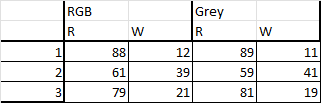

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as showImg

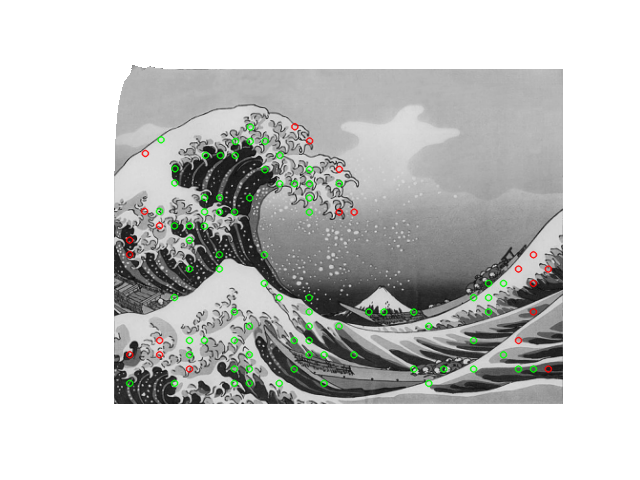

In [ ]:
img1 = cv.imread(input_path + '/cloud_master-rgb.png')      
img2 = cv.imread(input_path + '/cloud_3-rgb.png') 

csv1 = np.recfromcsv(input_path + '/cloud_master.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')
csv2 = np.recfromcsv(input_path + '/cloud_3.csv' , delimiter =',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

#Generate OpenCV keypoints from CSV file
kp1 = [cv.KeyPoint(csv1[i]['x'], csv1[i]['y'], 7.0) for i in range(len(csv1)) if csv1[i]['valid'] == 1]
kp2 = [cv.KeyPoint(csv2[i]['x'], csv2[i]['y'], 7.0) for i in range(len(csv2)) if csv2[i]['valid'] == 1]

#Grab descriptors considering only the first orientation bin (this assumes the images have no in-plane rotation changes)
#in case you want to match all orientations, you have to match the source descriptor with all orientations of the target descriptor and find argmin
des1 = desc_f1['descriptors'][...,0]
des2 = desc_f2['descriptors'][...,0]

#We can also access the keypoint IDs (useful for ground-truth validation)
ids1 = desc_f1['id'][...]
ids2 = desc_f2['id'][...]

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)

#Use IDs ground-truth to plot correct and incorrect matches
right, wrong = [], []
yesKp1, noKp1 = [], []
for i in range(len(matches)):
  if ids1[matches[i].queryIdx] == ids2[matches[i].trainIdx]:
    right.append(matches[i])
    yesKp1.append(kp1[i])
  else:
    wrong.append(matches[i])
    noKp1.append(kp1[i])

img_match = cv.drawKeypoints(img1, yesKp1, None, (0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_match = cv.drawKeypoints(img1, noKp1, img_match, (0,0, 255), flags=cv.DrawMatchesFlags_DRAW_OVER_OUTIMG | cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
showImg(img_match)

In [ ]:
def get_statistics(img, kp1=kp1, kp2=kp2, des1=des1, des2=des2, ids1=ids1, ids2=ids2, matches=matches):
  #Use IDs ground-truth to plot correct and incorrect matches
  right, wrong = [], []
  yesKp1, noKp1 = [], []
  for i in range(len(matches)):
    if ids1[matches[i].queryIdx] == ids2[matches[i].trainIdx]:
      right.append(matches[i])
      yesKp1.append(kp1[i])
    else:
      wrong.append(matches[i])
      noKp1.append(kp1[i])

  img_match = cv.drawKeypoints(img, yesKp1, None, (0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  img_match = cv.drawKeypoints(img, noKp1, img_match, (0,0, 255), flags=cv.DrawMatchesFlags_DRAW_OVER_OUTIMG | cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  showImg(img_match)
  return img_match


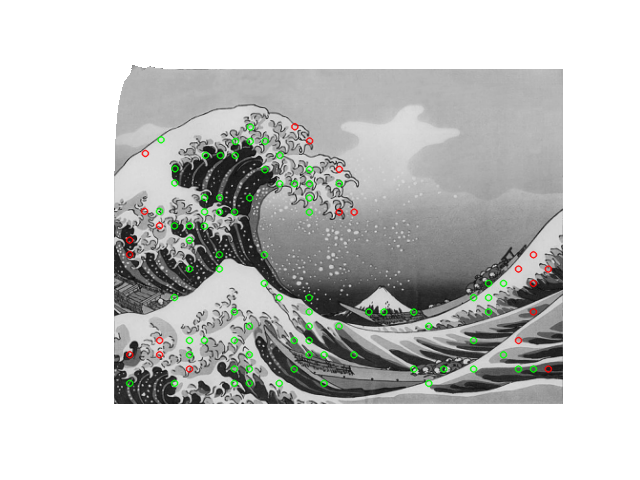

In [ ]:
my_img = get_statistics(img1)